# Final Organized Dataset Analysis - 

### Import Necessary Libraries

In [1]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

## Load Data

In [2]:
# Define the path to your data directory
data_dir = "./FinalDataset"

# Initialize lists to store data
data = []
labels = []

# Create a dictionary to store example images for each label
example_images = defaultdict(list)

# Loop through the subdirectories in the data directory
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            if filename.endswith(".JPG"):
                img_path = os.path.join(label_dir, filename)
                labels.append(label)
                data.append(img_path)
                # Store example images for each label
                if len(example_images[label]) < 5:  # Store up to 5 example images per label
                    example_images[label].append(img_path)


### Basic Data Analysis

In [3]:
# Create a DataFrame for analysis
df = pd.DataFrame({"Image_Path": data, "Label": labels})

# Basic data analysis
label_counts = df["Label"].value_counts()
total_images = len(df)

print("Number of Images:", total_images)
print("Number of Labels:", len(label_counts))
print("\nLabel Distribution:")
print(label_counts)

Number of Images: 2000
Number of Labels: 5

Label Distribution:
Label
downy mildew stage 1      400
downy mildew stage 2      400
Healthy leaves            400
powdery mildew stage 1    400
powdery mildew stage 2    400
Name: count, dtype: int64


### Plot label distribution

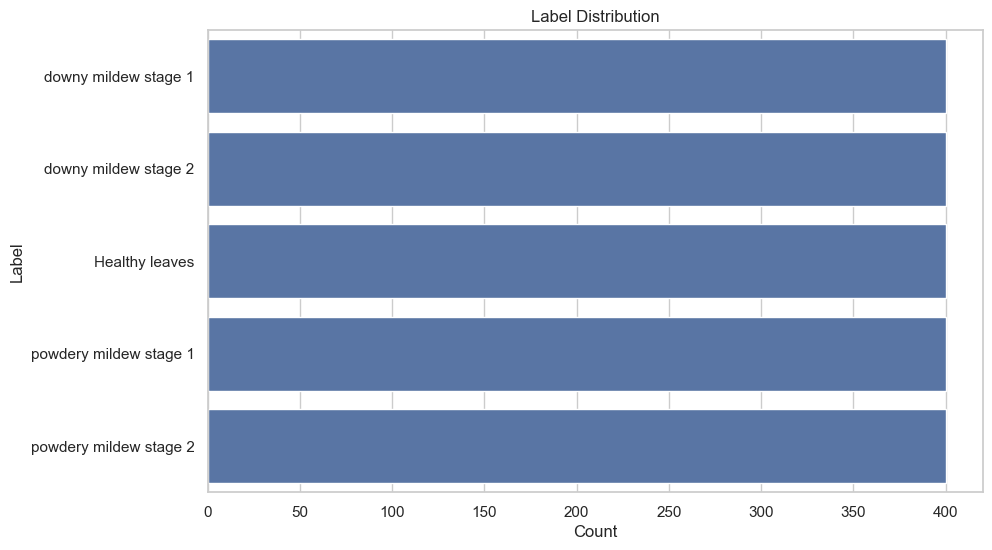

In [4]:
# Plot label distribution
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, y="Label", order=label_counts.index)
plt.title("Label Distribution")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()

### Display some sample images for each label

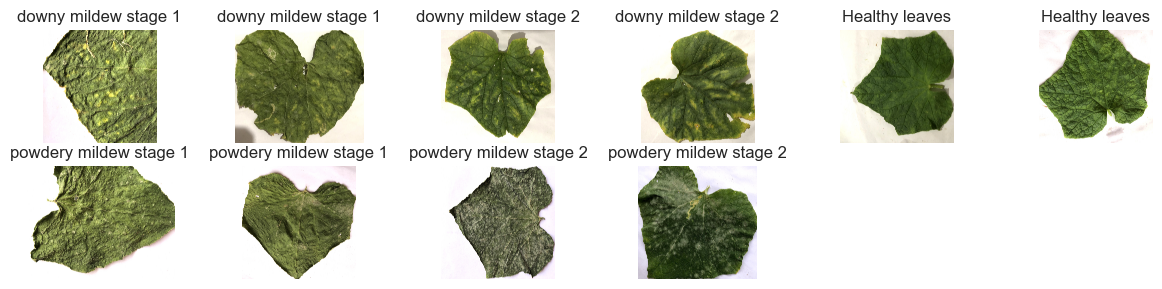

In [5]:
# Display some sample images for each label
plt.figure(figsize=(15, 5))
i = 1
for label, image_paths in example_images.items():
    for img_path in image_paths[:2]:  # Display up to 3 sample images per label
        img = Image.open(img_path)
        plt.subplot(3, 6, i)  # Adjusted the subplot grid to 2 rows and 8 columns
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")
        i += 1

plt.show()

----------------